In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,942 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [ ]:
import pandas as pd
df=pd.read_csv('./train.csv')
df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


# 1. 데이터 기본 확인 및 결측치 처리

In [ ]:
# -------------------------------
# 1. 데이터 전처리 (결측치 처리 포함)
# -------------------------------
import pandas as pd

# 파일 로드
df = pd.read_csv("./train.csv")

# 결측치 처리 (피해운전자 관련)
victim_cols = ['피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']
for col in victim_cols:
    df[col] = df[col].fillna("없음")

# 데이터 타입 및 결측치 확인
print(df.info())
print(df[victim_cols].isnull().sum())


# -------------------------------
# 2. EDA용 데이터 복사 및 열 선택
# -------------------------------

# 필요한 컬럼만 선택
eda_cols = [
    '사고일시',
    '요일',
    '기상상태',
    '시군구',
    '도로형태',
    '노면상태',
    '법규위반',
    '사고유형',
    '사고유형 - 세부분류',
    '기상상태',
    'ECLO'
]

# 원본 df에서 필요한 열만 복사 (deep copy)
df_data = df[eda_cols].copy()

# 결과 확인
print("\n[EDA용 데이터 확인]")
print(df_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     39609 non-null  object
 15  피해운전자 성별     39609 non-null  object
 16  피해운전자 연령     39609 non-null  object
 17  피해운전자 상해정도   39609 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

전체 데이터는 총 39,609건으로, 사고일시·기상상태·도로형태·법규위반·사고유형·ECLO 등 핵심 변수 중심으로 구성되어 있다.
원본 데이터는 가해·피해 운전자 정보, 지역, 사고 형태 등 다양한 변수를 포함하고 있었으나, 분석 목적이 “사고 피해 정도(ECLO)에 영향을 주는 요인 탐색”에 맞춰져 있기 때문에 사고 상황을 직접적으로 설명할 수 있는 주요 변수만 선별하였다. 이는 불필요한 컬럼을 제거함으로써 모델의 복잡도를 줄이고, 변수 간 다중공선성 문제를 예방하기 위한 조치이다.

또한 피해운전자 관련 변수의 결측치는 “없음”으로 통일하여 데이터 일관성을 확보하였다. 결측치를 임의로 제거하지 않고 의미 있는 범주로 대체한 것은, 실제 사고 현장에서 피해자 정보가 누락되는 상황까지 반영하기 위함이다.

 결과적으로 데이터는 결측이 존재하지 않으며, 분석용으로 정제된 상태이다. 이러한 전처리 과정은 불필요한 노이즈를 최소화하고, 향후 EDA 및 예측 모델링 단계에서 변수 간 관계를 보다 명확하게 해석할 수 있는 기초를 마련한 것으로 판단된다.

#2. EDA 그래프 (탐색적 데이터 분석)

In [ ]:
#폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 폰트 경로 직접 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print("현재 설정된 폰트:", plt.rcParams['font.family'])



현재 설정된 폰트: ['NanumGothic']


EDA 단계에서 요일, 도로형태, 기상상태, 지역(군 단위) 등 다양한 관점에서 시각화를 수행하여 사고 발생 패턴을 다각도로 이해하고, 향후 예측 모델 설계 시 핵심 변수로 작용할 수 있는 요인을 식별하기 위한 기초 자료로 활용하였다.

특히 요일·도로형태·지역·기상상태와 같은 변수들은 운전자의 행동 특성과 도로 구조적 요인과 밀접하게 연관되어 있어, 단순한 수치적 비교가 아닌 ‘사고의 맥락’을 해석할 수 있도록 시각화한 점이 중요하다 생각했다.

결과적으로 본 EDA는 교통사고 피해 예측 모델링에 앞서 변수 간 상관성을 탐색하고, 이후 피처 중요도 분석의 방향성을 제시하는 기초적이면서도 필수적인 단계로서 의미를 가진다.

아래의 시각화 결과들은 단순 빈도 분석을 넘어, 외적 환경 요인들이 사고 피해 수준에 유의미한 영향을 미친다는 근거를 시각적으로 제시한다.

/tmp/ipython-input-797511956.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_data, x='요일', y='ECLO', estimator='mean', ci=None)


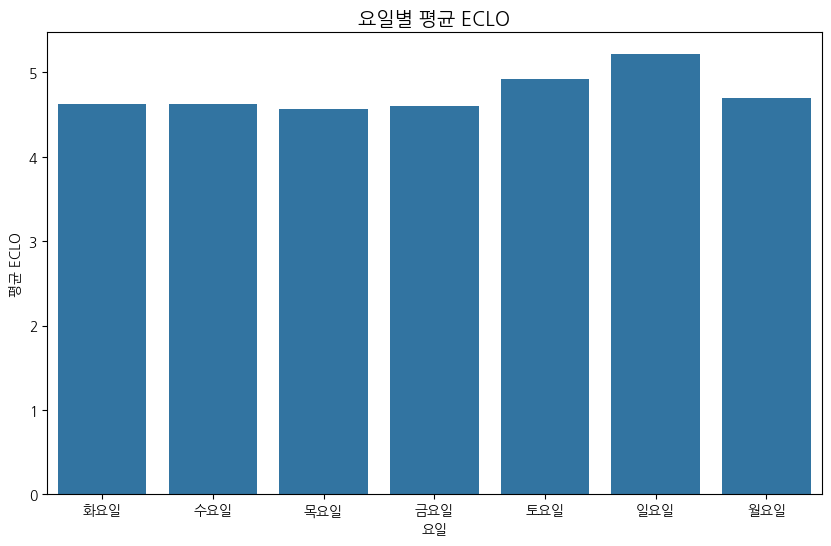

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_data, x='요일', y='ECLO', estimator='mean', ci=None)
plt.title("요일별 평균 ECLO", fontsize=14)
plt.xlabel("요일")
plt.ylabel("평균 ECLO")
plt.show()


요일별 평균 ECLO 분석 결과, 일요일에 사고 피해 정도가 가장 높게 나타났으며, 토요일과 금요일 순으로 비교적 높은 수치를 보였다. 반면, 화요일부터 목요일까지는 평균 ECLO가 상대적으로 낮은 수준을 유지하였다.

 이는 주말로 갈수록 ECLO가 상승하는 경향이 있음을 보여주며, 주중보다 주말에 발생하는 교통사고가 더 심각하거나 인명피해가 큰 사고로 이어질 가능성이 높음을 알 수 있다.

/tmp/ipython-input-3083915291.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_iqr, x='도로형태', y='ECLO', palette='Blues')


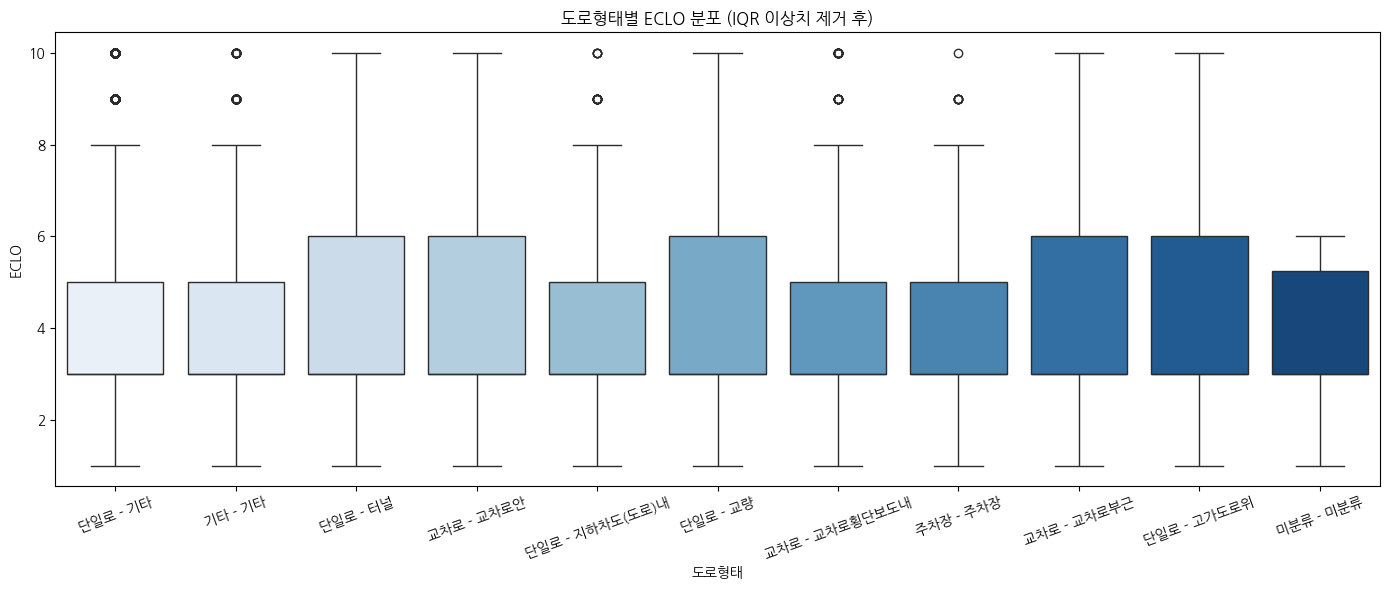

In [ ]:
# 도로형태별 ECLO 분포
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

Q1 = df['ECLO'].quantile(0.25)
Q3 = df['ECLO'].quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[(df['ECLO'] >= Q1 - 1.5*IQR) & (df['ECLO'] <= Q3 + 1.5*IQR)]

# 박스플롯 시각화
plt.figure(figsize=(14,6))
sns.boxplot(data=df_iqr, x='도로형태', y='ECLO', palette='Blues')
plt.title("도로형태별 ECLO 분포 (IQR 이상치 제거 후)")
plt.xlabel("도로형태")
plt.ylabel("ECLO")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


도로형태별 ECLO 분포를 살펴본 결과, 전반적으로 중앙값은 4~5 수준으로 안정적이지만, 일부 도로 유형에서 피해 정도의 변동폭이 크게 나타났다. 특히 ‘단일로-교차로부근’, ‘교차로-기타도로형태’, ‘단일로-기타도로형태’ 구간은 상단 이상치가 많아, 이들 구간에서 상대적으로 심각한 피해 사고가 발생했음을 시사한다.

반면, ‘고속도로’, ‘주차장’ 등 제한적 환경의 도로에서는 분포가 좁고 안정적인 형태를 보였다. IQR 기반 이상치 제거 과정을 거쳐 노이즈를 줄였기 때문에, 이번 시각화는 실제 도로 구조별 사고 심각도의 전반적 경향을 보다 명확히 보여준다.

이러한 결과는 도로 형태가 사고 피해 정도에 직접적인 영향을 미친다는 점을 강조한다. 교차로·분기점·단일로 부근 등 차량 흐름이 복잡하거나 시야 확보가 어려운 구간에서는 사고가 발생했을 때 ECLO가 높게 나타나는 경향이 있는 것으로 보여진다

/tmp/ipython-input-4204903843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_counts, x='기상상태', y='ECLO', palette='Blues_d')


<Figure size 1400x1000 with 0 Axes>

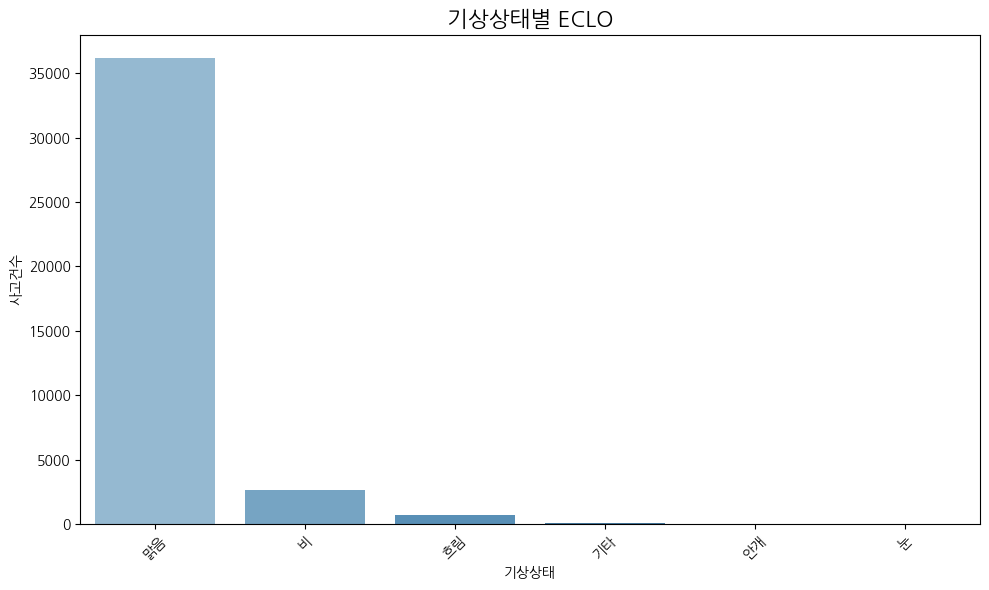

In [ ]:
# 3️ 기상상태별 사고 건수 --- 의미가 없는것 같음
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')
plt.figure(figsize=(14, 10))

weather_counts = df['기상상태'].value_counts().reset_index()
weather_counts.columns = ['기상상태', 'ECLO']

plt.figure(figsize=(10, 6))
sns.barplot(data=weather_counts, x='기상상태', y='ECLO', palette='Blues_d')
plt.title('기상상태별 ECLO', fontsize=16)
plt.xlabel('기상상태')
plt.ylabel('사고건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

기상상태별 ECLO 분포를 보면, ‘맑음’ 상태에서 압도적으로 많은 사고가 발생하였으며, 그 수가 다른 모든 날씨 조건을 합친 것보다 월등히 많았다. ‘비’, ‘흐림’ 등 불량 기상 조건에서도 일부 사고가 존재하지만 그 비중은 매우 낮았다.

이는 단순히 날씨가 나쁠 때보다, 오히려 평상시 운전자의 경계심이 낮아지는 맑은 날씨에 사고가 더 빈번하게 일어난다는 경향을 보여준다.

/tmp/ipython-input-3839083876.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gun_mean, x='군', y='ECLO', palette='viridis')


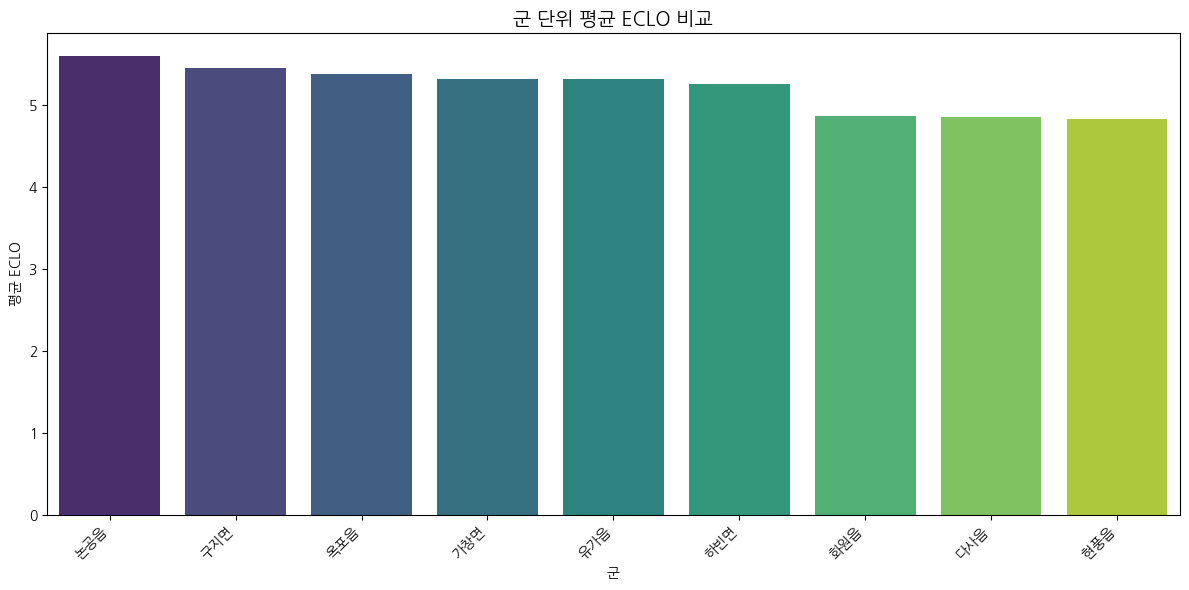

In [ ]:
# 4. 군별 ECLO 평균 그래프
# -------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 설정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# '시군구' 중에서 '군'이 포함된 행만 필터링
gun_df = df_data[df_data['시군구'].str.contains('군', na=False)].copy()

# 군 이름만 추출 (예: '경상남도 창녕군' → '창녕군')
gun_df['군'] = gun_df['시군구'].apply(lambda x: x.split()[-1] if '군' in x else None)

# 군별 평균 ECLO 계산
gun_mean = (
    gun_df.groupby('군')['ECLO']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# 그래프 시각화
plt.figure(figsize=(12,6))
sns.barplot(data=gun_mean, x='군', y='ECLO', palette='viridis')
plt.title("군 단위 평균 ECLO 비교", fontsize=14)
plt.xlabel("군")
plt.ylabel("평균 ECLO")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


군 단위 평균 ECLO 분석 결과, 논공읍과 구지면이 가장 높은 값을 기록하였으며, 월촌읍·다사읍·합홍읍 등 외곽 지역으로 갈수록 평균 ECLO가 다소 낮아지는 경향을 보였다.

이러한 결과는 지역별 도로 구조와 통행 특성이 사고 심각도에 직접적으로 작용한다는 점을 보여준다.

#3. 군집화를 통한 파생변수 추가 (KMeans)

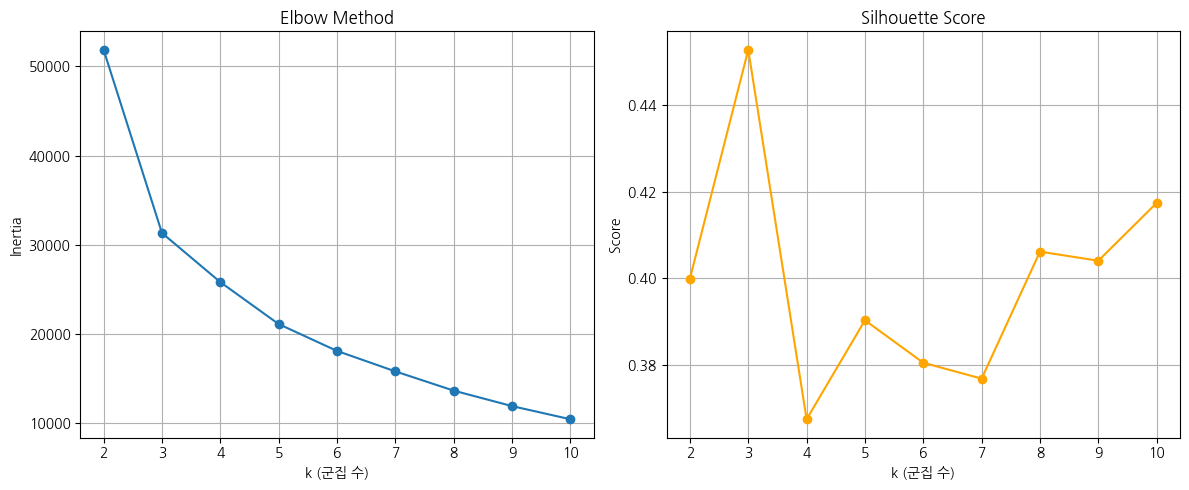

최적의 군집 수 (k): 3

각 군집별 데이터 수
cluster
1    21835
2    13222
0     4552
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------------
# 1. 수치형 및 인코딩 처리
# -------------------------------
df_cluster = df_data.copy()

# 사고일시 → 시(hour) 단위로 변환
df_cluster['사고시각'] = pd.to_datetime(df_cluster['사고일시']).dt.hour

# 범주형 변수 원-핫 인코딩
df_cluster = pd.get_dummies(df_cluster, columns=['요일','기상상태','도로형태','노면상태'], drop_first=True)

# 수치형 컬럼 선택 및 스케일링
num_cols = df_cluster.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cluster[num_cols])

# -------------------------------
# 2. 최적 군집 수 탐색
# -------------------------------
K_range = range(2, 11)
inertias, silhouette_scores = [], []

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=42)
    kmeans.fit(scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled, kmeans.labels_))

# Elbow + Silhouette 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'o-', label='Inertia (Elbow)')
plt.title('Elbow Method')
plt.xlabel('k (군집 수)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'o-', color='orange', label='Silhouette')
plt.title('Silhouette Score')
plt.xlabel('k (군집 수)')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# -------------------------------
# 3. 최적 군집으로 재학습
# -------------------------------
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"최적의 군집 수 (k): {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, n_init=20, max_iter=500, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(scaled)

print("\n각 군집별 데이터 수")
print(df_cluster['cluster'].value_counts())


Elbow Method와 Silhouette Score 분석 결과, 최적의 군집 수는 3개(k=3) 로 도출되었다. 이는 데이터 내 사고 특성이 세 가지 주요 패턴으로 구분될 수 있음을 의미한다. Elbow Method에서 기울기 변화가 완만해지는 지점이 k=3에서 나타났고, Silhouette Score 역시 동일한 구간에서 가장 높은 값을 보이며 군집 간 구분도가 가장 명확했다. 군집별 데이터 수를 보면 1번 군집이 21,835건으로 가장 많고, 0번 군집이 4,552건으로 가장 적어, 일부 특정 패턴이 상대적으로 높은 빈도를 차지함을 확인할 수 있다.

이러한 결과는 교통사고의 피해 수준과 사고 유형이 단일 요인에 의존하지 않고, 여러 특성 조합에 따라 유형화될 수 있음을 시사한다.

 따라서 군집화 결과를 통해 사고 유형별 특성을 구체적으로 파악하고, 각 군집에 맞는 예방 정책—예를 들어 군집별 도로 개선, 시간대별 단속 강화—등을 도출하는 것이 향후 모델링 및 정책 수립에 있어 중요한 단계라 판단된다.

# 4. 선형회귀 (Linear Regression)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# 데이터 준비
df_lin = df_cluster.copy()
df_lin['ECLO'] = pd.to_numeric(df_lin['ECLO'], errors='coerce')
df_lin = df_lin.dropna(subset=['ECLO'])

# 문자형 컬럼 제거
non_numeric_cols = df_lin.select_dtypes(include=['object']).columns
df_lin = df_lin.drop(columns=non_numeric_cols, errors='ignore')

# X, y 분리
X = df_lin.drop(columns=['ECLO'])
y = df_lin['ECLO']

# 다항항 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = StandardScaler().fit_transform(X_poly)

# 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 성능 확인
print("=== 선형회귀 (PolynomialFeatures=2) 결과 ===")
print(f"R² Score: {model.score(X_poly, y):.4f}")

=== 선형회귀 (PolynomialFeatures=2) 결과 ===
R² Score: 0.5961


PolynomialFeatures=2을 적용한 선형회귀 분석 결과, 결정계수(R²)는 0.5961로 나타났다. 이는 모델이 전체 데이터의 약 59.6% 수준의 분산을 설명하고 있음을 의미하며, 비교적 중간 이상의 설명력을 가진 것으로 평가된다. 단순 선형모델에 비해 다항항을 추가함으로써 변수 간의 비선형 관계를 반영할 수 있었고, 교통사고 피해 정도(ECLO)가 단일 요인보다는 여러 변수의 상호작용에 의해 영향을 받는다는 점을 확인할 수 있다.

이 결과 외적 요인들이 단순히 독립적으로 작용하기보다, 서로 결합되어 사고 피해 강도를 결정짓는 복합적 구조임을 보여준다. 즉, 특정 도로 형태와 시간대, 기상 조건이 동시에 나타날 때 피해 정도가 증가하는 경향을 모델이 일정 부분 포착한 것으로 해석된다.

#4. 유의한 피처 탐색 (ANOVA)

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 14.3 MB/s eta 0:00:00


In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# -----------------------------
# 1. 데이터 전처리
# -----------------------------
df_anova = df_cluster.copy()

# ECLO 숫자형 변환 및 결측 제거
df_anova['ECLO'] = pd.to_numeric(df_anova['ECLO'], errors='coerce')
df_anova = df_anova.dropna(subset=['ECLO'])

# 문자형 컬럼 제거
non_numeric_cols = df_anova.select_dtypes(include=['object']).columns
df_anova = df_anova.drop(columns=non_numeric_cols, errors='ignore')

# -----------------------------
# 2. ANOVA 검정 수행
# -----------------------------
anova_results = []

for col in df_anova.columns.tolist():
    # ECLO는 종속변수이므로 제외
    if col == 'ECLO':
        continue

    series = df_anova[col]

    # 숫자형이면서 더미(0/1) 형태인 컬럼만 수행
    if pd.api.types.is_numeric_dtype(series) and series.nunique() == 2:
        group0 = df_anova.loc[series == 0, 'ECLO']
        group1 = df_anova.loc[series == 1, 'ECLO']

        # 두 그룹 모두 데이터가 충분히 있을 때만 수행
        if len(group0) > 3 and len(group1) > 3:
            stat, p = f_oneway(group0, group1)
            anova_results.append({
                '변수명': col,
                'F통계량': stat,
                'p값': p
            })

# -----------------------------
# 3. 결과 정리 및 출력
# -----------------------------
anova_df = pd.DataFrame(anova_results).sort_values('p값', ascending=True)
anova_df['유의여부'] = anova_df['p값'].apply(lambda x: '유의함(p<0.05)' if x < 0.05 else '유의하지 않음')

print("=== ANOVA 유의 변수 상위 15개 ===")
print(anova_df.head(15))


=== ANOVA 유의 변수 상위 15개 ===
                    변수명        F통계량            p값         유의여부
3                요일_일요일  104.631477  1.578137e-24  유의함(p<0.05)
6       도로형태_교차로 - 교차로안  100.870893  1.048123e-23  유의함(p<0.05)
8          도로형태_기타 - 기타   88.939111  4.284442e-21  유의함(p<0.05)
7   도로형태_교차로 - 교차로횡단보도내   54.355158  1.706012e-13  유의함(p<0.05)
4                요일_토요일   24.252971  8.481634e-07  유의함(p<0.05)
15       도로형태_주차장 - 주차장   23.586390  1.198843e-06  유의함(p<0.05)
13        도로형태_단일로 - 터널   21.372856  3.792783e-06  유의함(p<0.05)
11        도로형태_단일로 - 기타   19.722367  8.978915e-06  유의함(p<0.05)
0                요일_목요일   18.064050  2.140847e-05  유의함(p<0.05)
9      도로형태_단일로 - 고가도로위   10.648379  1.102607e-03  유의함(p<0.05)
18           노면상태_젖음/습기   10.566604  1.152452e-03  유의함(p<0.05)
5                요일_화요일    6.738629  9.438192e-03  유의함(p<0.05)
1                요일_수요일    6.737607  9.443599e-03  유의함(p<0.05)
10        도로형태_단일로 - 교량    5.326312  2.101091e-02  유의함(p<0.05)
16              노면상태_기타    2

ANOVA 분석 결과, 요일과 도로형태, 노면상태 일부 변수에서 ECLO 평균 차이가 통계적으로 유의하게 나타났다. 특히, ‘요일_일요일’(p<0.001) 과 ‘도로형태_교차로 - 교차로안’, ‘도로형태_기타 - 기타’ 변수의 F통계량이 높게 나타났다. 주말과 교차로 구간이 교통사고 피해 정도에 큰 영향을 미치는 주요 요인임을 확인할 수 있다. 이 외에도 토요일, 터널, 주차장, 젖음/습기 등의 조건에서도 유의한 차이가 나타나, 특정 요일과 도로 구조, 노면 상태가 사고 심각도를 좌우하는 요인으로 작용하고 있음을 보여준다.

이러한 결과는 교통사고 피해 정도가 단순히 우연적으로 발생하지 않고, 시간적 요인(요일) 과 공간적 요인(도로형태) 의 상호작용에 의해 구조적으로 영향을 받는다는 점을 시사한다.

# 5. 모델 학습 (sklearn - ElasticNet · RandomForest · GradientBoosting)

---



In [ ]:
!pip install XGBoost

In [ ]:
import xgboost
print(xgboost.__version__)

3.1.0


In [ ]:
# ===========================================
# 5. 모델 학습 (ElasticNet · RandomForest · XGBoost)
# ===========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. 데이터 준비
# -------------------------------
df_model = df_cluster.copy()

df_model['ECLO'] = pd.to_numeric(df_model['ECLO'], errors='coerce')
df_model = df_model.dropna(subset=['ECLO'])

non_numeric_cols = df_model.select_dtypes(include=['object']).columns
df_model = df_model.drop(columns=non_numeric_cols, errors='ignore')

X = df_model.drop(columns=['ECLO'])
y = df_model['ECLO']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 2. 모델 정의
# -------------------------------
models = {
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "RandomForest": RandomForestRegressor(
        n_estimators=200, max_depth=10, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    ),
}

# -------------------------------
# 3. 학습 및 평가
# -------------------------------
results = []

for name, model in models.items():
    if name == "ElasticNet":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    elif name == "XGBoost":
        # 최신 버전이라도 DataFrame 참조 버그 방지용
        model.fit(X_train.to_numpy(), y_train.to_numpy())
        preds = model.predict(X_test.to_numpy())

    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        "모델": name,
        "MAE": round(mae, 4),
        "RMSE": round(rmse, 4),
        "R²": round(r2, 4)
    })

results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
print("\n=== 모델 성능 비교 ===")
print(results_df)



=== 모델 성능 비교 ===
             모델     MAE    RMSE      R²
1  RandomForest  1.4891  2.0208  0.5896
2       XGBoost  1.4950  2.0474  0.5787
0    ElasticNet  1.6938  2.4136  0.4145


ElasticNet, RandomForest, XGBoost 세 가지 모델을 비교한 결과, RandomForest가 R²=0.5896으로 가장 높은 설명력을 보였으며, MAE(1.4891)와 RMSE(2.0208) 또한 가장 낮은 수치를 기록했다. 이는 비선형적 변수 간 관계를 효과적으로 학습할 수 있는 트리 기반 모델이 교통사고 피해 예측에 더 적합함을 의미한다. 반면 ElasticNet은 R²=0.4145로 설명력이 낮았는데, 이는 선형 가정에 기반한 모델이 다차원적이고 비선형적인 교통사고 데이터의 특성을 충분히 반영하지 못했기 때문으로 해석된다.

이러한 결과는 사고 피해 정도(ECLO)가 단순히 개별 요인에 의해 결정되는 것이 아니라, 도로 형태·요일·기상 상태 등 여러 요인의 상호작용에 따라 복합적으로 형성된다는 점을 뒷받침한다. 따라서 예측 정확도를 높이기 위해서는 비선형성과 변수 간 상호작용을 반영할 수 있는 트리 기반 모델 또는 앙상블 기법의 활용이 필요하다.

#6. Stacking (Booster + Meta Model)

In [ ]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [ ]:
# ===========================================
# 6. 스태킹 회귀모델 (CatBoost 메타모델)
# ===========================================
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# -------------------------------
# 1. 베이스 모델 구성
# -------------------------------
base_estimators = [
    ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    ))
]

# -------------------------------
# 2. 메타모델 (CatBoost)
# -------------------------------
meta_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=False,
    random_state=42
)

# -------------------------------
# 3. 스태킹 모델 구성
# -------------------------------
stack_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=True,  # 원본 특성 + base 모델 예측값 함께 사용
    n_jobs=-1
)

# -------------------------------
# 4. 학습
# -------------------------------
# ElasticNet용 스케일링 데이터 사용 시도 → 모든 모델에 통일
stack_model.fit(X_train_scaled, y_train)
stack_preds = stack_model.predict(X_test_scaled)

# -------------------------------
# 5. 성능 평가
# -------------------------------
mae = mean_absolute_error(y_test, stack_preds)
rmse = np.sqrt(mean_squared_error(y_test, stack_preds))
r2 = r2_score(y_test, stack_preds)

print("\n=== [CatBoost 기반 Stacking 결과] ===")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")


=== [CatBoost 기반 Stacking 결과] ===
MAE : 1.4796
RMSE: 2.0118
R²  : 0.5932


CatBoost를 메타모델로 활용한 스태킹 회귀모델의 성능은 R² = 0.5932, MAE = 1.4796, RMSE = 2.0118로 나타났다. 이는 개별 모델 중 가장 성능이 우수했던 RandomForest(R²=0.5896)보다 소폭 향상된 결과로, 서로 다른 알고리즘의 예측값을 결합함으로써 일반화 성능이 개선되었음을 보여준다. 특히 MAE와 RMSE가 모두 낮아진 점은, 모델이 극단적인 오차에 덜 민감해졌고, 전반적으로 안정적인 예측을 수행하고 있음을 의미한다.

#7. Feature Importance

/tmp/ipython-input-2343152676.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


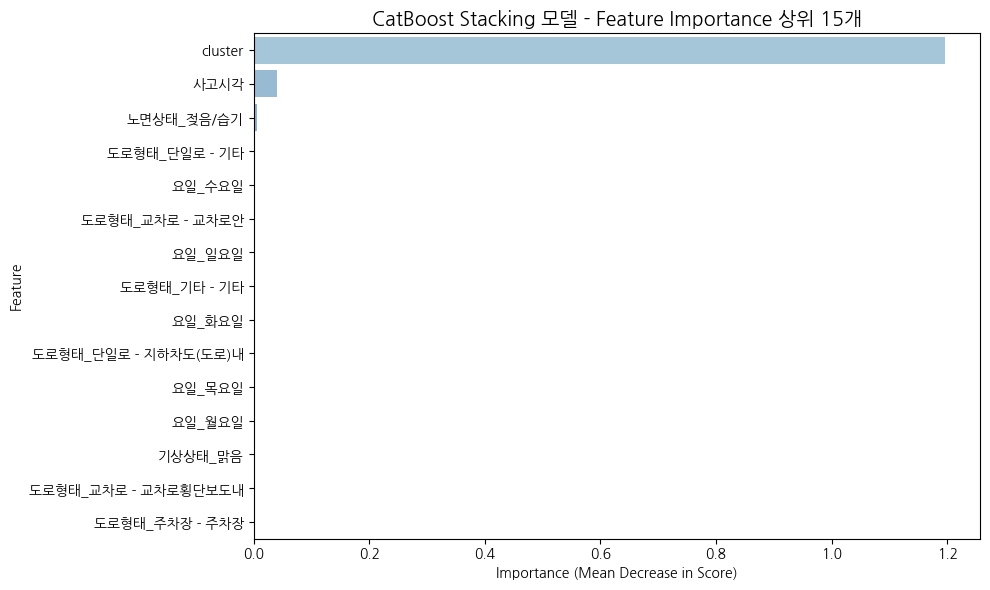


=== Feature Importance (상위 20개) ===
                 Feature  Importance       Std
32               cluster    1.196912  0.008094
0                   사고시각    0.040707  0.003470
30            노면상태_젖음/습기    0.006622  0.002139
22         도로형태_단일로 - 기타    0.002367  0.001215
2                 요일_수요일    0.002194  0.001230
17       도로형태_교차로 - 교차로안    0.002095  0.001334
4                 요일_일요일    0.001895  0.001553
19          도로형태_기타 - 기타    0.001458  0.001305
6                 요일_화요일    0.001207  0.001554
23  도로형태_단일로 - 지하차도(도로)내    0.000918  0.001791
1                 요일_목요일    0.000609  0.000505
3                 요일_월요일    0.000521  0.001401
8                기상상태_맑음    0.000447  0.000315
18   도로형태_교차로 - 교차로횡단보도내    0.000439  0.000580
26        도로형태_주차장 - 주차장    0.000190  0.000070
11               기상상태_흐림    0.000187  0.000585
20      도로형태_단일로 - 고가도로위    0.000186  0.000122
24         도로형태_단일로 - 터널    0.000069  0.000060
28            노면상태_서리/결빙    0.000049  0.000078
15               기상상태_안

In [ ]:
# ===========================================
# 7. Feature Importance (Permutation Importance)
# ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# -------------------------------
# 1. Permutation Importance 계산
# -------------------------------
# 스태킹 모델이 학습되어 있어야 함 (stack_model)
result = permutation_importance(
    stack_model,
    X_test_scaled,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# -------------------------------
# 2. 결과 DataFrame 정리
# -------------------------------
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean,
    "Std": result.importances_std
}).sort_values("Importance", ascending=False)

# -------------------------------
# 3. 상위 15개 변수 시각화
# -------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(15),
    x="Importance",
    y="Feature",
    palette="Blues_d"
)
plt.title("CatBoost Stacking 모델 - Feature Importance 상위 15개", fontsize=14)
plt.xlabel("Importance (Mean Decrease in Score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# -------------------------------
# 4. 전체 중요도 표 확인
# -------------------------------
print("\n=== Feature Importance (상위 20개) ===")
print(importance_df.head(20))


CatBoost 기반 스태킹 모델의 변수 중요도 분석 결과, cluster 변수가 압도적으로 높은 중요도를 보였으며, 그 뒤를 사고시각, 노면상태_젖음/습기, 도로형태_단일로-기타, 요일_수요일 등이 따랐다. 특히 cluster는 개별 변수보다 훨씬 높은 기여도를 기록했는데, 이는 앞선 군집화 과정에서 도출된 사고 패턴이 피해 정도 예측에 강력한 설명력을 지닌다는 것을 의미한다.

즉, 군집화로 파생된 사고 유형(예: 도심 교차로 사고, 외곽 야간 사고 등)이 단일 요인보다 ECLO를 더 효과적으로 구분한다는 점을 확인할 수 있다.

이 결과는 모델이 사고의 시공간적 맥락을 반영한 변수가 피해 예측의 핵심 요인으로 작용함을 보여준다. 시간대(사고시각)와 도로·노면 조건이 함께 높은 중요도를 나타낸 점은, 운전 환경과 사고 발생 시점의 결합이 피해 강도를 결정짓는 주요 요인으로 사료된다.